# This notebook augments data using different techniques like histogram equalization, adaptive histogram equalization, gaussian noise, salt and pepper noise, brightness enhance, contrast enhance. Uses a mix of Tensorflow, scikit-image and openCV libs to achieve this. Also shown is : how to load the image in its original size, apply the augmentation technique and then resize the image to the desired size. While resizing, if the target size is > image size , then zero-padding is done, else LANCZOS filter is used to resize the Image.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import pathlib
from shutil import copyfile
import shutil
import random
from os import path
from PIL import Image, ImageOps
from skimage.util import random_noise

In [13]:
def resize_image(img,w,h):
    if (h<img_height):
        delta_width = img_width - w
        delta_height = img_height - h
        pad_width = delta_width // 2
        pad_height = delta_height // 2
        padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
        resized_img = ImageOps.expand(img, padding)
    else:
        resized_img = ImageOps.fit(img,(img_height,img_width),method=Image.LANCZOS)
    return resized_img

def load_resized_image(image_obj):
    image_obj = tf.keras.utils.array_to_img(image_obj)
    w,h=image_obj.size
    resized_image = resize_image(image_obj,w,h)
    resized_image_arr = tf.keras.preprocessing.image.img_to_array(resized_image,dtype=np.uint8) 
    return resized_image_arr

In [14]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original[:,:,0],cmap='gray')

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented[:,:,0],cmap='gray')

Target height and width. We apply the augmentation and then resize the image to target height and width

In [15]:
img_width = 299
img_height = 299
image_path = "/content/astilbe.jpg"

While loading the image use the original height and width of the image not to resize it at this point. If resized while loading a smaller image will be blown up to target size , and we avoid this

In [33]:
image = cv2.imread(str(image_path))
(h, w, c) = image.shape[:3]
print("image height:"+str(h))
print("image width:"+str(w))
img = tf.keras.utils.load_img(image_path, grayscale=True, target_size=(w, h)) #load the image in tf.keras using the original height and width
#img = tf.keras.utils.load_img(image_path, target_size=(w, h))
img_array = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8) 
print(img_array.shape)
orig_img = load_resized_image(img_array)
print(orig_img.shape)

image height:256
image width:256
(256, 256, 1)
(299, 299, 1)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


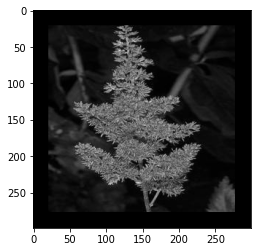

In [34]:
plt.imshow(orig_img[:,:,0],cmap='gray')

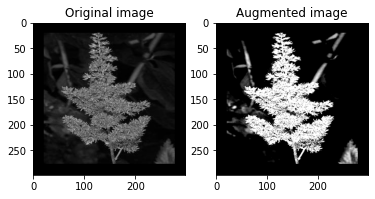

In [36]:
contrast_adj = load_resized_image(tf.image.adjust_contrast(img_array, 4))
visualize(orig_img, contrast_adj)

Apply augmentations from the TensorFlow lib, including brightness, contrast enhance, flip etc

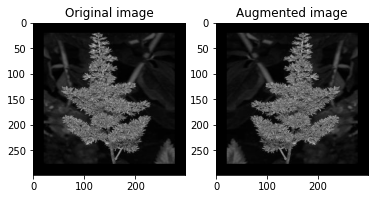

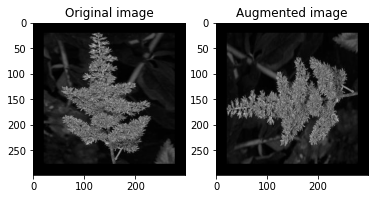

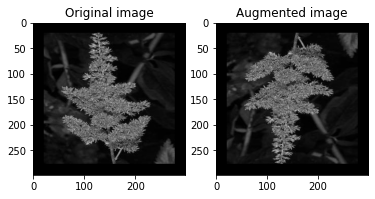

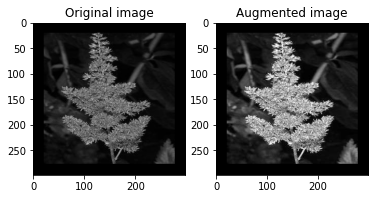

In [37]:
flipped = load_resized_image(tf.image.flip_left_right(img_array))
visualize(orig_img, flipped)
rotated =load_resized_image(tf.image.rot90(img_array))
visualize(orig_img, rotated)


flipped_up = load_resized_image(tf.image.flip_up_down(img_array))
visualize(orig_img, flipped_up)
bright_adj = load_resized_image(tf.image.adjust_brightness(img_array, 0.4))
visualize(orig_img, bright_adj)

Apply gaussian and salt and pepper noise using scikit-image lib

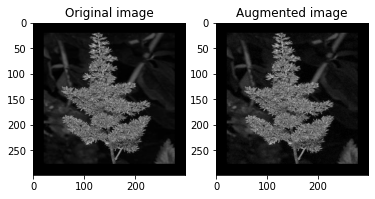

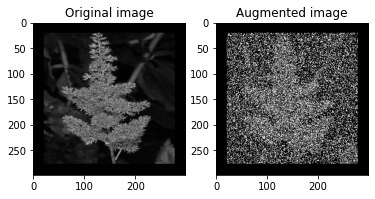

In [38]:
gaussian_noise = load_resized_image(random_noise(img_array,mode='gaussian',mean=0,var=0.00018,seed=0))
visualize(orig_img,gaussian_noise)
sp_noise = load_resized_image(random_noise(img_array, mode='s&p',amount=0.5,seed=0)) #apply noise on original image and then resize
visualize(orig_img,sp_noise)

Apply histogram equalization

 performing histogram equalization...


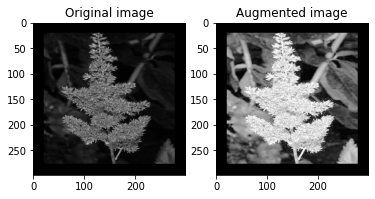

In [39]:
print(" performing histogram equalization...")
def histeq(img_array):
    gray_img = img_array[:,:,0].astype("uint8")
    equalized = cv2.equalizeHist(gray_img)
    equalized = equalized.reshape(equalized.shape[0],equalized.shape[1],1)
    return equalized
visualize(orig_img,load_resized_image(histeq(img_array)))

Apply Adaptive histogram equalization

[INFO] applying CLAHE...


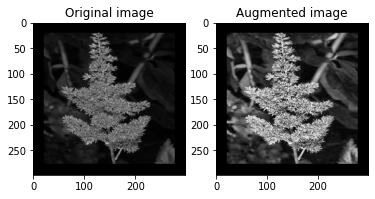

In [40]:
print("[INFO] applying CLAHE...")
def clahe(img_array,clip,tile):
    gray_img = img_array[:,:,0].astype("uint8")
    clahe = cv2.createCLAHE(clipLimit=clip,
        tileGridSize=(tile, tile))
    equalized = clahe.apply(gray_img)
    equalized = equalized.reshape(equalized.shape[0],equalized.shape[1],1)
    return equalized
visualize(orig_img,load_resized_image(clahe(img_array,3.0,8)))

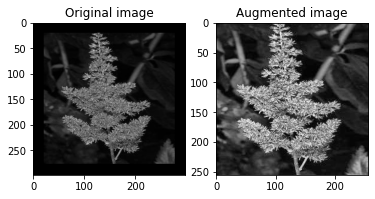

In [41]:
visualize(orig_img,clahe(img_array,2.0,6))

Apply gamma correction

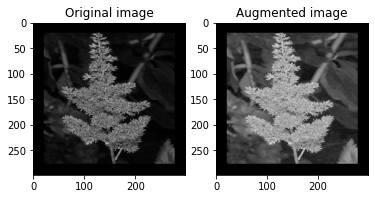

In [42]:
gamma_corrlr= tf.image.adjust_gamma(img_array,gamma=0.5)
gamma_corrlr = load_resized_image(gamma_corrlr)
visualize(orig_img,gamma_corrlr)

Apply Poisson noise

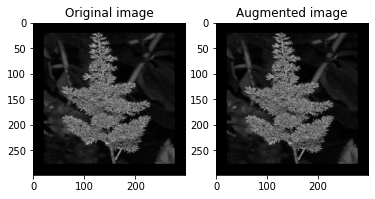

In [43]:
def poisson_noise(img_array):
    image=img_array[:,:,0].astype("uint8")
    vals=len(np.unique(image))
    vals=2.3**np.ceil(np.log2(vals))
    image[image<0]=0
    noisy=np.random.poisson(image*vals)/float(vals)
    noisy = noisy.reshape(noisy.shape[0],noisy.shape[1],1)
    return noisy
p_img=poisson_noise(img_array)
p_img = load_resized_image(p_img)
visualize(orig_img,p_img)

In [ ]:
cv2.imwrite("/content/test_1.png",p_img)

True